# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from scipy import optimize, special

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
%matplotlib inline



# Question 1

We illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$.

c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))


Text(0.5, 0.92, 'Figure 1: HF/HM ratio as a function of alpha and sigma')

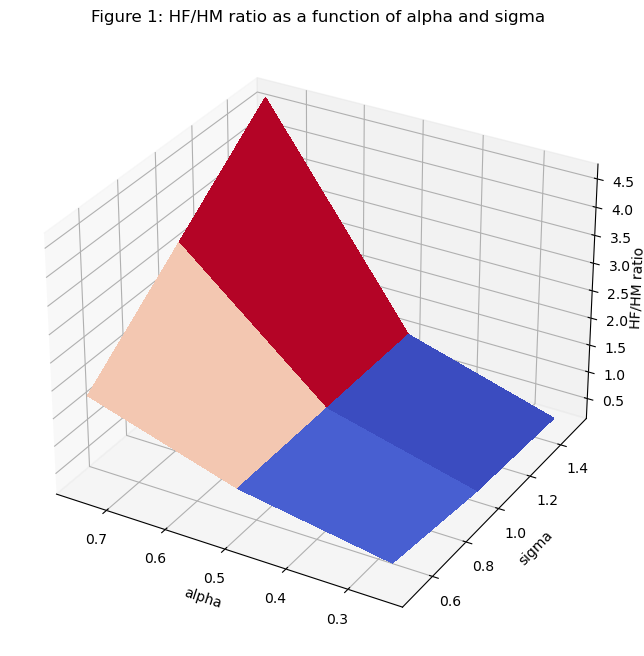

In [2]:
import HouseholdSpecializationModel
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

# creating the different values for alpha and sigma
alpha_range = np.array([0.25, 0.50, 0.75])
sigma_range = np.array([0.5, 1.0, 1.5])

# create meshgrid of alpha and sigma values
alpha, sigma = np.meshgrid(alpha_range, sigma_range)

# calculate HF/HM ratio for each combination of alpha and sigma
hf_hm_ratio = np.zeros_like(alpha)
for i in range(alpha.shape[0]):
    for j in range(sigma.shape[1]):
        # set alpha and sigma values for model instance
        model.par.alpha = alpha[i, j]
        model.par.sigma = sigma[i, j]
        # solve model and calculate HF/HM ratio
        opt = model.solve_discrete()
        hf_hm_ratio[i, j] = opt.HF / opt.HM

# plot the surface in a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha, sigma, hf_hm_ratio,cmap=cm.coolwarm,linewidth=0,antialiased=False)

ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM ratio', rotation=90)

ax.invert_xaxis()
#making the graph wider so i can see the text on the z-axis
fig.set_size_inches(10, 8)
ax.zaxis.labelpad=-0.7
#set title
ax.set_title('Figure 1: HF/HM ratio as a function of alpha and sigma')






Figure 1 shows that an increase in alpha resolves in the HF/HM ratio. The same is true for sigma. However, When alpha is between 0 and .05 sigma does not have a large effect on the ratio, but when alpha is larger than 0.5, sigma have an increasing effect on the ratio. The intuion is, that when increasing the household production $(\alpha)$ women will work more than men. This seems reasonable when looking at the definition for H. Here we should also see that a larger $(\alpha)$ would resolve in women working more. When $(\sigma)$ increases we have that women will work more than men and when both sigma and alpha is very large women will work a lot more than men.

# Question 2

We need to plot log $\frac{H_F}{H_M}$ against log $\frac{w_F}{w_M}$ for $w_f\in[0.8, 0.9, 1.0, 1.1, 1.2]$

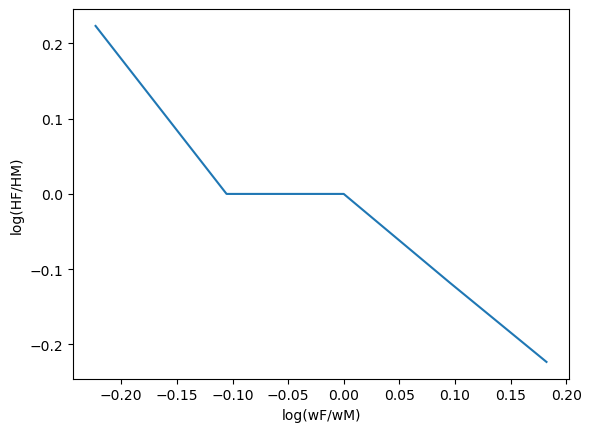

In [3]:
model.par.alpha = 0.5
model.par.sigma = 1

# Each wF value is solved using a loop and the method "solve_discrete()" that is defined in the class "HouseholdSpecializationModelClass":
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete()
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# The ratio of the HF and HM values are calculated and stored in the variable "HF_HM":
HF_HM = model.sol.HF_vec / model.sol.HM_vec

# log(HF/HM) is now plotted against log(wF/wM):
plt.plot(np.log(model.par.wF_vec/model.par.wM), np.log(HF_HM))
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()


Figure 2 plots log $\frac{H_F}{H_M}$ against log $\frac{w_F}{w_M}$. When wages are low for women they tend to spend more time working from home, and likewise less when wages are higher. We see a greater decrease in the start given the wage change log $\frac{w_F}{w_M} = -0.20$ to $-0.10$ compared to wage change $0.00$ to  $0.10$. 

# Question 3

We now assume that the choice set is continuous, i.e. $LM, LF , HM, HF \in [0, 24]$. Next, we plot $\frac{H_F}{H_M}$ against $\frac{w_F}{w_M}$ for $w_f\in[0.8, 0.9, 1.0, 1.1, 1.2]$. 

First we define a new optimization method calles solve inside our HouseholdSpecializationModel.py. The met uses a minimze() function from the scipy.optimize library to find the values of LM, HM, LF, and HF that maximize the objective function. The solver is using the Sequential Least SQuares Programming (SLSQP) algorithm to minimize the negative of the objective function subject to the given constraints and bounds. The method takes an initial guess for the values of LM, HM, LF, and HF, and returns the optimal values of these variables that maximize the objective function. The constraints and bounds are used to restrict the feasible set of solutions for the optimization problem, and states that the varaibles cannot be smaller than 0 and larger than 24.


c:\Users\Birk\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


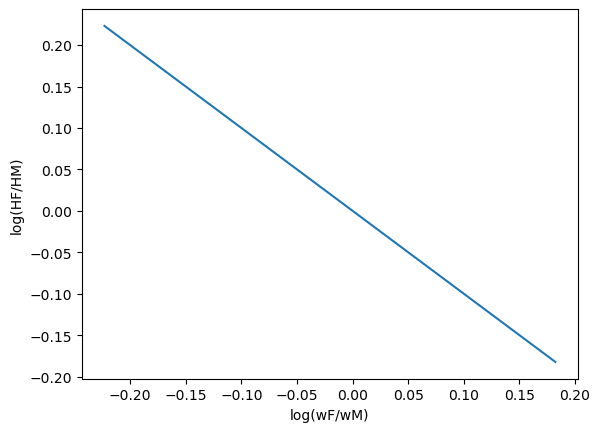

In [4]:

# Each wF value are solved using  a loop and the optimization method "solve":
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# The ratio of the HF and HM values are calculated and stored in the variable "HF_HM":
HF_HM = model.sol.HF_vec / model.sol.HM_vec

# log(HF/HM) is now plotted against log(wF/wM):
plt.plot(np.log(model.par.wF_vec/model.par.wM), np.log(HF_HM))
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()


Now, the graph is different. We see that the HF/HM-ratio is not constant, but rather changes with the wage-ratio. This is because the choice set is continuous. We observe that the HF/HM-ratio has a slower decrease compared to the figur in question 2. Nontheless, women still preffere to work more when wages are high and less when wages are low, which is what the graph is telling us.

# Question 4

In this exercise we run the regression, $\log\frac{H_{F}}{H_{M}}=\beta_{0}+\beta_{1}\log\frac{w_{F}}{w_{M}}$, to estimate $\beta_{0}$ and $\beta_{1}$, for a fixed range of men wages and $w_{F}\in[0.8,0.9,1.0,1.1,1.2]$. We will choose $\alpha$ and $\sigma=$ such it minimizes $\left(\beta_{0}-\hat{\beta}_{0}\right)^{2}+\left(\beta_{1}-\hat{\beta}_{1}\right)^{2}$, where Siminski and Yetsenga (2022) found that, ${\beta}_{0}=0.4$ and ${\beta}_{1}=-0.1$. 

We start by creating a function called solve in HouseholdSpecializationModel.py (line 118-152) that solves for the vector of female wages which we have called solve_wF_vec. Next, we create an estimate function (line 185-208), that solves the above desribed problem by the use of the Nelder-Mead algorithm. The function takes the output from solve_wf_vec as input and performs the regression using OLS defined in (line 173-183). Lastly, it finds $\alpha$ and $\sigma$ that minimizes problem. To plot the results we use the estimated intercept and slope coefficients which minimized the problem. We will use the results in a function that loops over the wage for women and men, to create point estimates to be used in the plot. We have denoted our estimated plot as, Our model.

c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:184: RuntimeWarning: divide by zero encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)
c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:68: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:68: RuntimeWarning: divide by zero encountered in doubl

 beta0 = 0.4000, beta1 = -0.1000, deviation = 0.0000, alpha = 0.9820, sigma = 0.1000


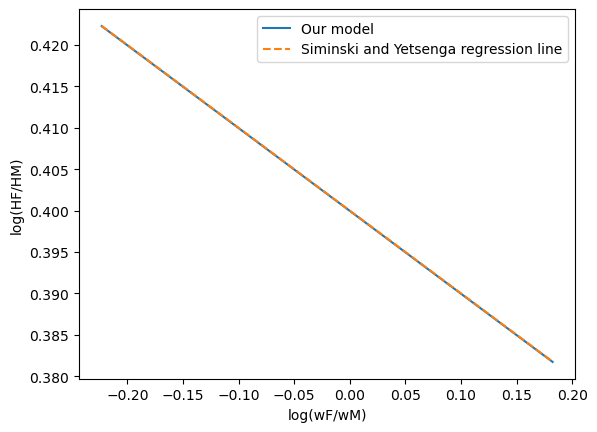

In [5]:
model4 = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model4.estimate()
# solve for each wF value
for i, wF in enumerate(model4.par.wF_vec):
    model4.par.wF = wF
    opt = model4.solve()
    model4.sol.LM_vec[i] = opt.LM
    model4.sol.HM_vec[i] = opt.HM
    model4.sol.LF_vec[i] = opt.LF
    model4.sol.HF_vec[i] = opt.HF

# calculate HF/HM
log_HF_HM = np.log(model4.sol.HF_vec / model4.sol.HM_vec)

#define log_wratio
log_wratio = np.log(model4.par.wF_vec/model4.par.wM)

beta0_hat = model4.sol.beta0
beta1_hat = model4.sol.beta1
print(f' beta0 = {model4.sol.beta0:.4f}, beta1 = {model4.sol.beta1:.4f}, deviation = {((0.4-model4.sol.beta0)**2+(-0.1- model4.sol.beta1)**2):.4f}, alpha = {model4.par.alpha:.4f}, sigma = {model4.par.sigma:.4f}')


# Siminski and Yetsenga's regression line
def f(log_wratio):
    return 0.4 +(-0.1)*log_wratio

# plot log(HF/HM) against log(wF/wM)

fig = plt.plot(log_wratio, log_HF_HM )
#plot fig with the regression line
#plt.plot(log_wratio, f(log_wratio))
#make one of the plots dashed
plt.plot(log_wratio, f(log_wratio), '--')
plt.legend(['Our model', 'Siminski and Yetsenga regression line'])

plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')

plt.show()


From our output, we see that to minimize the function we get the following values $\sigma = 0.100$ and $\alpha = 0.982$. The result has a higher decline than Siminski and Yetsenga's regression line, and this could be caused by risk tolarance. As with Siminiski and Yesenga's, we find that ${\beta}_{0}=0.4$ and ${\beta}_{1}=-0.1$. 

# Question 5

In this section we first use the estimated function in question 4 but now with $\alpha=0.5$ to analyze whether or not it can help match the data.

The code below is the same used for question 4, however $\alpha$ is now equal to 0.5. We find that beta_0 now is equal to 0 due to men and women being equally prodoctive. Therefore, alpha=0.5 does not help match the data since it does not match Simeniski and Yetsenga's regression line.

c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:184: RuntimeWarning: divide by zero encountered in log
  y = np.log(sol.HF_vec/sol.HM_vec)
c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:68: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
c:\Users\Birk\OneDrive - University of Copenhagen\University\Kandidat\2. semester\Introduction to programming and numerical analysis\Assignments\projects-2023-ldg790-wxz394\inauguralproject\HouseholdSpecializationModel.py:71: RuntimeWarning: invalid value encountered in double_scalars

 beta0 = 0.0000, beta1 = -0.0996, deviation = 0.1600, alpha = 0.5000, sigma = 0.0996


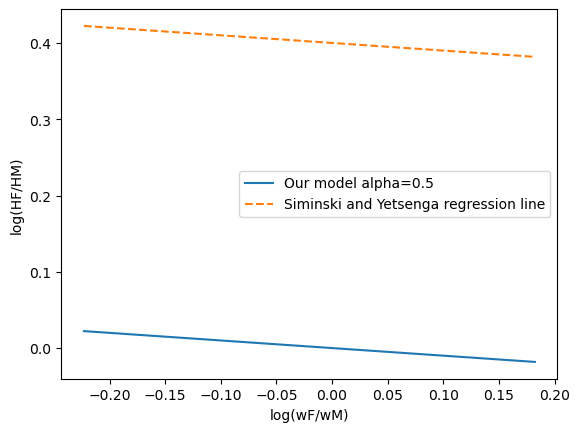

In [6]:
model4 = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model4.estimateV2()
# solve for each wF value
for i, wF in enumerate(model4.par.wF_vec):
    model4.par.wF = wF
    opt = model4.solve()
    model4.sol.LM_vec[i] = opt.LM
    model4.sol.HM_vec[i] = opt.HM
    model4.sol.LF_vec[i] = opt.LF
    model4.sol.HF_vec[i] = opt.HF

# calculate HF/HM
log_HF_HM = np.log(model4.sol.HF_vec / model4.sol.HM_vec)

#define log_wratio
log_wratio = np.log(model4.par.wF_vec/model4.par.wM)


print(f' beta0 = {model4.sol.beta0:.4f}, beta1 = {model4.sol.beta1:.4f}, deviation = {((0.4-model4.sol.beta0)**2+(-0.1- model4.sol.beta1)**2):.4f}, alpha = {model4.par.alpha:.4f}, sigma = {model4.par.sigma:.4f}')


# Siminski and Yetsenga's regression line
def f(log_wratio):
    return 0.4 +(-0.1)*log_wratio

# plot log(HF/HM) against log(wF/wM)

fig = plt.plot(log_wratio, log_HF_HM )
#plot fig with the regression line
#plt.plot(log_wratio, f(log_wratio))
#make one of the plots dashed
plt.plot(log_wratio, f(log_wratio), '--')
plt.legend(['Our model alpha=0.5', 'Siminski and Yetsenga regression line'])

plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')

plt.show()


Next, we will add an extension to the model. The results above found that when $\alpha$ is equal to 0.5, men and women are equally productive giving a $\beta_0=0$. To obtain same results by Seminski and Yetsenga we increase disutility for men working in home production. The intuition is that, in the modern soceity men are being more prodoctive at home and replacing many of the womens tradional responsibilities. Therefore, increasing a share theta of the male hours devoted to home production in their utility will decrease the underlying gender inequality and make the model more repsentable for the modern society.

The disutility function is now defined as:
$\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{(T_{M}+HM\cdot \theta)^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right),\,\rho>1,\nu>0,\epsilon>0$

 Model 3: beta0 = 0.4000, beta1 = -0.1000, deviation = 0.0000, alpha = 0.5000, sigma = 0.1306, theta = 19.7728


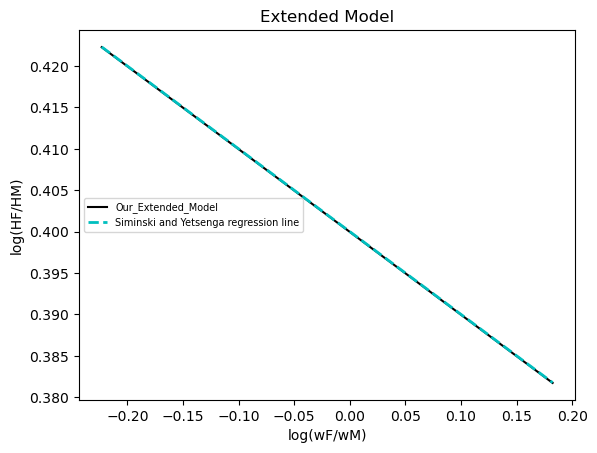

In [7]:
#setting the parameters to their default values.
model4.par.alpha = 0.5
model4.par.sigma = 1
model4.par.wF = 1
model4.par.theta = 0 

#We estimate the model with the default parameters
model4.par.sigma = 1
model4.estimateV3()

print(f' Model 3: beta0 = {model4.sol.beta0:.4f}, beta1 = {model4.sol.beta1:.4f}, deviation = {((0.4-model4.sol.beta0)**2+(-0.1- model4.sol.beta1)**2):.4f}, alpha = {model4.par.alpha:.4f}, sigma = {model4.par.sigma:.4f}, theta = {model4.par.theta:.4f}')

# storing the results of the model prediction of home work ratio for our extended model.
extended_model = np.empty(5)

#Compute model predictions of home work ratio using each female wage defined in the vector.
for i, wF in enumerate(model4.par.wF_vec):
    model.par.wF = wF
    extended_model[i] = beta0_hat + beta1_hat*np.log(wF/model4.par.wM)

# plot log(HF/HM) against log(wF/wM)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), extended_model, label = 'Our_Extended_Model', color= 'k' )
ax.plot(np.log(model.par.wF_vec), f(log_wratio), label = 'Siminski and Yetsenga regression line', color = 'c', linestyle='--', alpha= 1, linewidth = 2)
ax.set_title('Extended Model')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')
ax.legend(loc=6, prop={'size': 7}) 

The figure "Extended model" shows that our extension to the model results in the same beta coefficients as Siminski and Yetsenga (2022). This was done using alpha =0.5 and a theta=19.77. However, sigma has changed compared to our model in quesion 3 and 4. The intuition is that, to obtain the same results as Semininski and Yetsenga with an $\alpha=0.5$, men performs an extra 19.77 pct. of the responsibilites at home. This makes sense, as in the modern soceity we see that men takes on more responsibilites.